In [1]:
import IPython
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# librosa sample

In [2]:
# 波形取得
y, sr = librosa.load(librosa.ex('trumpet'))
# 音声を流す
IPython.display.Audio(y, rate=sr)

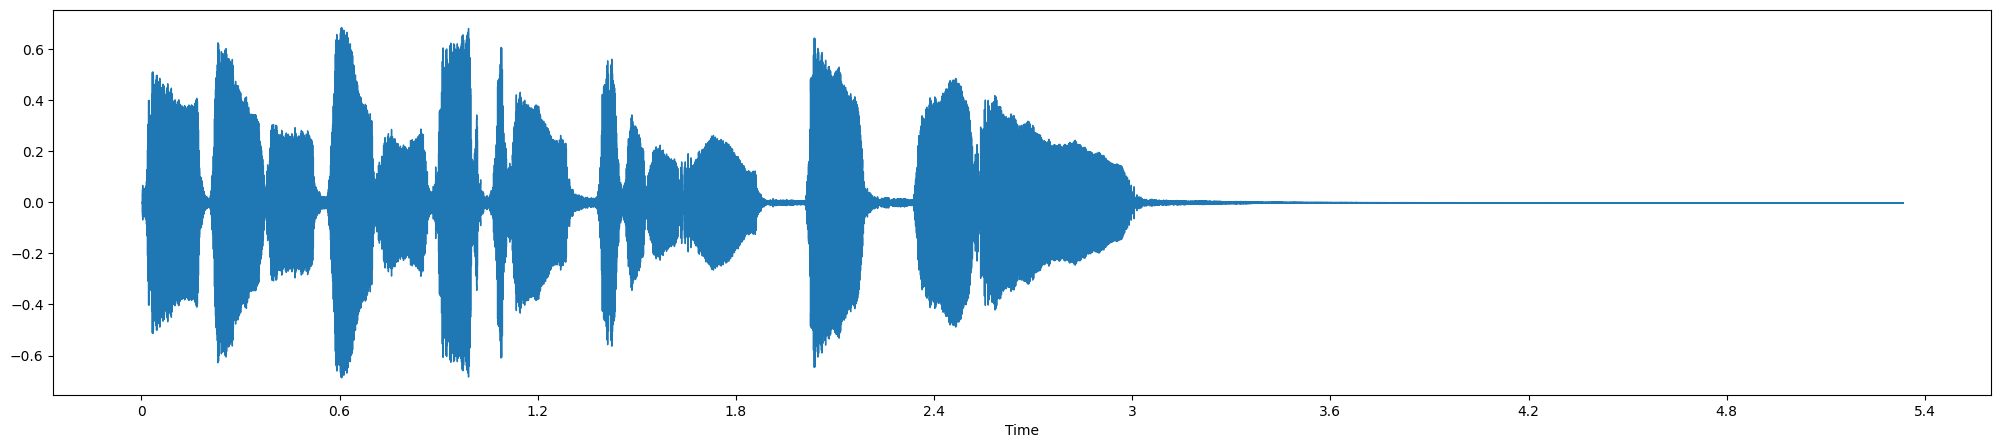

In [3]:
# 波形を表示
plt.figure(figsize=(25,5))
librosa.display.waveshow(y, sr=sr)
plt.show()

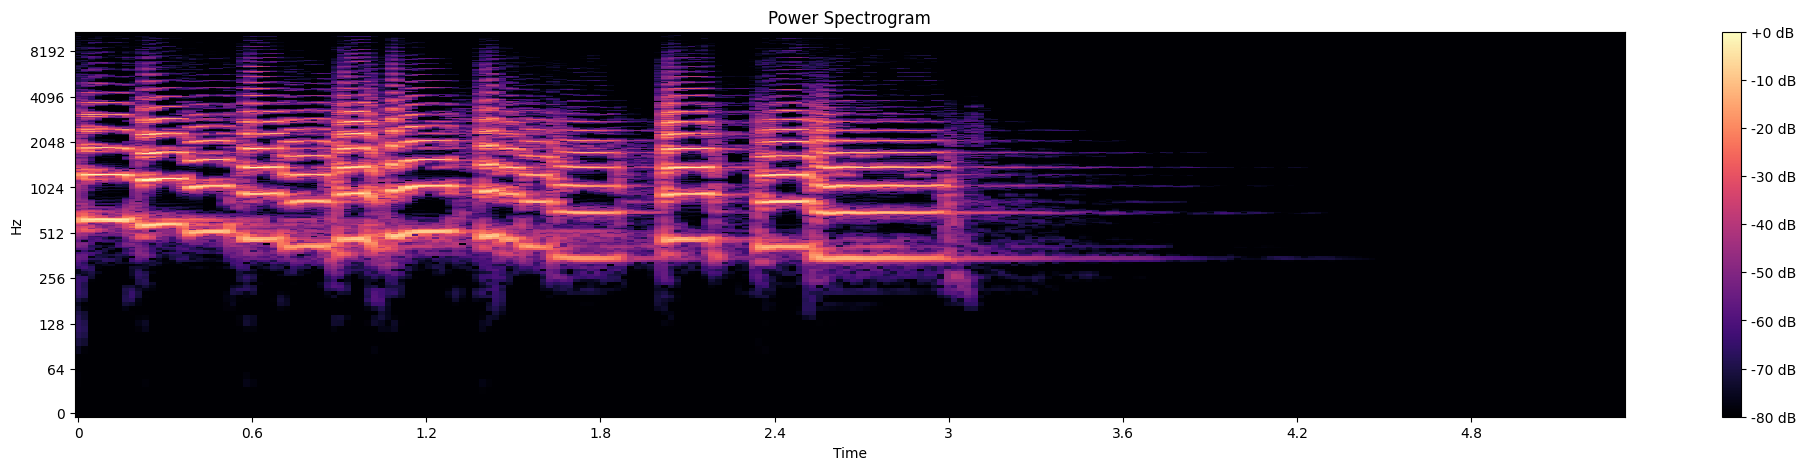

In [4]:
# fft
stft = librosa.stft(y)
abs_stft = np.abs(stft)
power_spec = librosa.amplitude_to_db(abs_stft, ref=np.max)

plt.figure(figsize=(25,5))
librosa.display.specshow(power_spec, y_axis='log', x_axis='time', sr = sr)
plt.title('Power Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

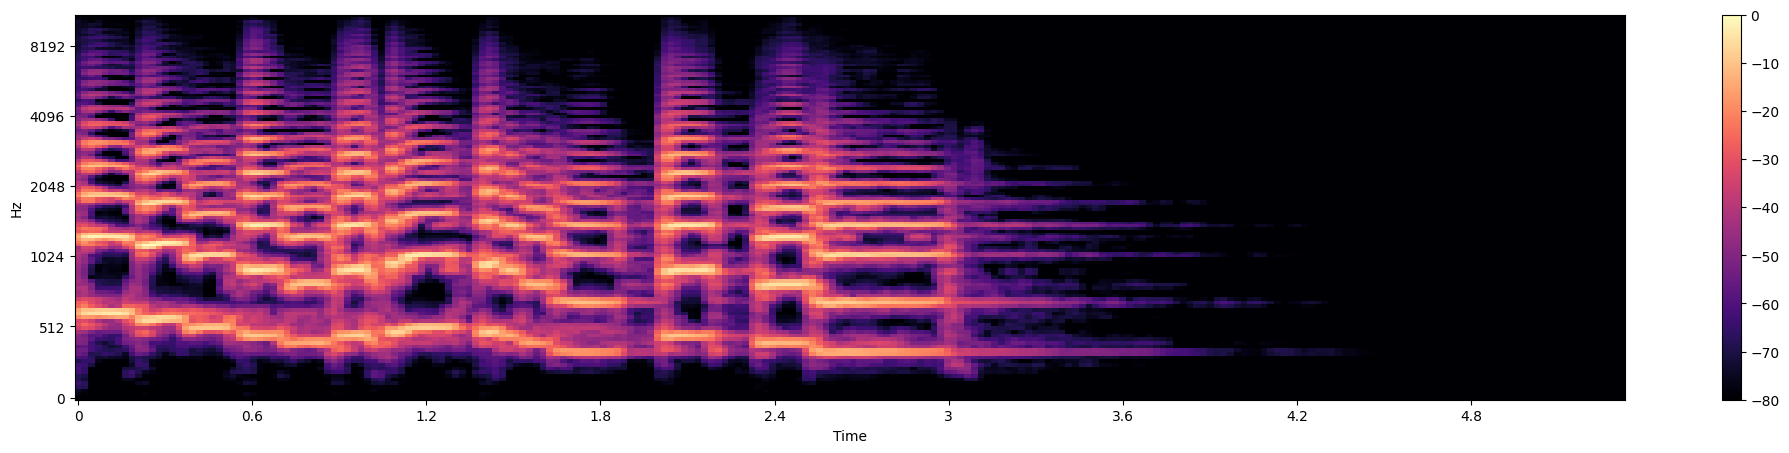

In [5]:
# メルスペクトログラム
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)

# 波形表示
plt.figure(figsize=(25,5))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar()
plt.show()

# 音源分離後の波形分析

In [6]:
def pipeline(file_name: str, sampling_rate: int = 44100):
  # 波形取得
  y, sr = librosa.load(file_name, sr=sampling_rate)
  # 音声を流す
  IPython.display.display(IPython.display.Audio(y, rate=sr))

  # 波形を表示
  plt.figure(figsize=(25,5))
  librosa.display.waveshow(y, sr=sr)
  plt.title("Raw waveform")
  plt.show()

  # fft
  stft = librosa.stft(y)
  abs_stft = np.abs(stft)
  power_spec = librosa.amplitude_to_db(abs_stft, ref=np.max)

  plt.figure(figsize=(25,5))
  librosa.display.specshow(power_spec, y_axis='log', x_axis='time', sr = sr)
  plt.title('Power Spectrogram')
  plt.colorbar(format='%+2.0f dB')
  plt.show()

  # メルスペクトログラムを取得
  S = librosa.feature.melspectrogram(y=y, sr=sr)
  S_dB = librosa.power_to_db(S, ref=np.max)

  # メルスペクトログラム表示
  plt.figure(figsize=(25,5))
  librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
  plt.title("Melspectrogram")
  plt.colorbar(format='%+2.0f dB')
  plt.show()

  return y, sr

In [7]:
# origin source
# 任意の波形を指定
source_file_path = "/content/drive/MyDrive/demucs/Sample_BeeMoved_48kHz16bit.m4a"
pipeline(source_file_path)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
# 分離音源のディレクトリを指定
separated_dir = "/content/drive/MyDrive/demucs_separated/htdemucs/Sample_BeeMoved_48kHz16bit"

In [10]:
instruments_list = ["vocals", "other", "bass", "drums"]
separated_souces = {}
for instrument in instruments_list:
  print(instrument)
  y, _ = pipeline(f"{separated_dir}/{instrument}.mp3")
  separated_souces[instrument] = y

Output hidden; open in https://colab.research.google.com to view.

# 音源の再合成（ピアノなし）

In [11]:
reaggregated_waveform = separated_souces["vocals"] + separated_souces["bass"] + separated_souces["drums"]

y = reaggregated_waveform
sr = 44100

# 音声を流す
IPython.display.display(IPython.display.Audio(y, rate=sr))

# 波形を表示
plt.figure(figsize=(25,5))
librosa.display.waveshow(y, sr=sr)
plt.title("Raw waveform")
plt.show()

# fft
stft = librosa.stft(y)
abs_stft = np.abs(stft)
power_spec = librosa.amplitude_to_db(abs_stft, ref=np.max)

plt.figure(figsize=(25,5))
librosa.display.specshow(power_spec, y_axis='log', x_axis='time', sr = sr)
plt.title('Power Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

# メルスペクトログラムを取得
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)

# メルスペクトログラム表示
plt.figure(figsize=(25,5))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.title("Melspectrogram")
plt.colorbar(format='%+2.0f dB')
plt.show()

Output hidden; open in https://colab.research.google.com to view.